# Homework 9
### Timothy Petliar
### N12592901

The goal of this problem set is solve the discete Lyapunov equation using an iterative method.
In particular, given $\beta, A,C, \text{and} \ D$, we seek a pair $P \in \mathcal{M}(n \times n), \delta \in \mathbb{R} \ \text{that satisfies} \
x'P'x + \delta =\beta x'A'(D+P)Ax+\beta tr(C'(D+P)C) + \beta \delta$ for all $x\in \mathbb{R}^{n}$. 

In [30]:
import numpy as np

import quantecon as qe

import matplotlib.pyplot as plt

A=np.array(([0.8, -0.1],[-0.1, 0.8]))

b=0.9 #beta

C=np.identity(2) 

D=np.identity(2)

e=0.000000001 #Tolerance


In [31]:
def spec_norm(M):
    """
Computes spectral norm of inout matrix M using ||M||=sqrt(r(M'M)) where 'r' denotes the the spectral radius.
    """
    A_tA=M.T @ (M) #Compute M'M
    
    r=np.amax(np.abs(np.linalg.eigvals(A_tA))) # Compute r(M'M) where 'r' denotes the the spectral radius
   
    norm=np.sqrt(r) #||M||=sqrt(r(M'M))
    
    return norm

In [32]:
def equil_price_func(A,b,C,D,e):
   """
  Compute the equilibrium using an iteratice method.  Namely, start P_init as identity matrix then 
  compute P_new=b*A'(D+P)A. Compare spec_norm(P_new-P) until within desired tolerance. Matrix A will be checked for stability.
  Matrix A  must satisfy p(A)<1/sqrt(b). Returns equilibrium price matrix and delta term.
   """
    P=np.identity(2)
   
    P_new=np.identity(2)
    
    itr=100000  #maximum number of iterations. Way more then would ever be necassary
    
    for i in range (0,itr):       
        
        P_new=(b*A.T @(D+P)@A)  # Repeatedly apply b * A'(D+P)A
        
        if spec_norm(A)>=1/(np.sqrt(b)):
            
            print("Convergence condition not satisfied. p(A)>=1/sqrt(b)") #test stabiltiy of A
            
            break  
        
        elif spec_norm(P- P_new)<e:  #End loop at set tolerance
            
            break
        
        elif i==itr-1: #If the total iterations were exceeded for some reasons. Would alert likely error in problem setup
            
            print("Convergence failed")
            
            break
       
        else:
            
            P[:]=P_new
    
    delta= b/(1-b)*np.trace(C.T@(D + P)@C) #Compute delta*
        
    return P_new, delta
        


             


In [37]:
equil_price_func(A,b,C,D,e)

(array([[ 1.73947283, -0.95056407],
        [-0.95056407,  1.73947283]]), 49.310510969268876)

In [235]:
def lyapunov_solver(A,b,C,D):
    """
Takes the initial puts and transform them into the necassary form for the QuantEcon library Lyapunov solver to be used.
    """
    M=b* A.T @ D @ A
    
    G=np.sqrt(b) *A.T
   
    return qe.matrix_eqn.solve_discrete_lyapunov(G,M, max_it=100)

lyapunov_solver(A,b,C,D)

array([[ 1.73947283, -0.95056407],
       [-0.95056407,  1.73947283]])

I compared the output my function to the out of the QuantEcon method. When I increased max_it, the QuantEcon output did not change, so this told me it was accurate to the digits displayed. I then kept decreasing my tolerance term until I achieved the same decimal output using my method. 

In [236]:
def price(P,d,x):
    """
    Takes stable price marix, delta, and desired input vector to actually the price.
    """
    return (x.T @ P @ x) +d #P(x)=x'P x

In [238]:
def contour(A,b,C,D,e):
    
    N=300
    
    coord = np.linspace(-10, 10, N)

    x = np.zeros((2,1))
    
    X, Y = np.meshgrid(coord, coord)
   
    Price_val = np.zeros((N, N))
   
    P, d = equil_price_func(A,b,C,D,e)

    
    for k in range(N):        #Compute prices for a grid of values
        
        for j in range(N):
            
            x[0] = coord[k]
            
            x[1] = coord[j]
            
            Price_val[k, j] = price(P,d,x)

    Plot=plt.contourf(X, Y, Price_val, alpha=1 #Filled plot
    
    Plot=plt.contour(X, Y, Price_val, alpha=1) #Contour lines
    
    
    plt.clabel(Plot, inline=1, fontsize=12, colors='black')
    
    plt.title('Price Function Contour Plot')
    
    plt.xlabel('$x_{_1}$', fontsize=16)
    
    plt.ylabel('$x_{_2}$', fontsize=16)
    
    plt.show()
    
    return None

At first I had only a filled plot, but this resulted in something very jagged. Apparently, plotting the contour lines and then filling them avoids this issue. Credit to Brando for significant help with plotting 

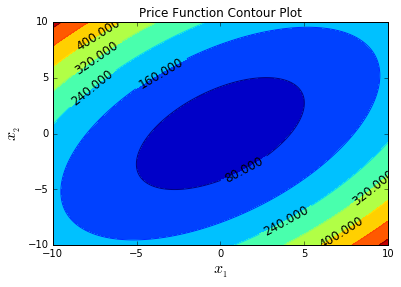

In [240]:
%matplotlib inline

contour(A,b, C,D,e)